In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
root = "../../_data/MPIIFaceGaze/"

# MPII Face Gaze

## Compare with "MPII Face Gaze - p##" and "MPIIGaze - Evaluation Subset - sample list for eye image"

In [2]:
root_face = "../../data/MPIIFaceGaze/"
root_gaze = "../../data/MPIIGaze/Evaluation Subset/sample list for eye image/"

list_gaze_anno_path = [root_gaze+x for x in os.listdir(root_gaze) if os.path.isfile(root_gaze+x)]
list_face_anno_path = [root_face + list_gaze_anno_path[i].split('/')[-1][:3] + '/' + list_gaze_anno_path[i].split('/')[-1] for i in range(len(list_gaze_anno_path))]

In [9]:
for content in zip(list_gaze_anno_path, list_face_anno_path):
    print(content[0], '\t', content[1])

../../data/MPIIGaze/Evaluation Subset/sample list for eye image/p00.txt 	 ../../data/MPIIFaceGaze/p00/p00.txt
../../data/MPIIGaze/Evaluation Subset/sample list for eye image/p01.txt 	 ../../data/MPIIFaceGaze/p01/p01.txt
../../data/MPIIGaze/Evaluation Subset/sample list for eye image/p02.txt 	 ../../data/MPIIFaceGaze/p02/p02.txt
../../data/MPIIGaze/Evaluation Subset/sample list for eye image/p03.txt 	 ../../data/MPIIFaceGaze/p03/p03.txt
../../data/MPIIGaze/Evaluation Subset/sample list for eye image/p04.txt 	 ../../data/MPIIFaceGaze/p04/p04.txt
../../data/MPIIGaze/Evaluation Subset/sample list for eye image/p05.txt 	 ../../data/MPIIFaceGaze/p05/p05.txt
../../data/MPIIGaze/Evaluation Subset/sample list for eye image/p06.txt 	 ../../data/MPIIFaceGaze/p06/p06.txt
../../data/MPIIGaze/Evaluation Subset/sample list for eye image/p07.txt 	 ../../data/MPIIFaceGaze/p07/p07.txt
../../data/MPIIGaze/Evaluation Subset/sample list for eye image/p08.txt 	 ../../data/MPIIFaceGaze/p08/p08.txt
../../data

In [28]:
gaze_anno = []
face_anno = []

for g_path, f_path in zip(list_gaze_anno_path, list_face_anno_path):
    
    with open(g_path) as f:
        contents = f.readlines()
    # gaze_anno += [content.strip().split(" ") for content in contents]
    gaze_anno.append([content.strip().split(" ") for content in contents])
    
    with open(f_path) as f:
        contents = f.readlines()
    # face_anno += [content.strip().split(" ") for content in contents]
    face_anno.append([content.strip().split(" ") for content in contents])

In [92]:
# print(len(gaze_anno), len(face_anno))

45000 37667


In [29]:
print(len(gaze_anno), len(face_anno))

15 15


In [81]:
for i in range(len(gaze_anno)):
    print("p{:02d}".format(i), '\t', len(gaze_anno[i]), '\t', len(face_anno[i]))

p00 	 3000 	 2927
p01 	 3000 	 2904
p02 	 3000 	 2916
p03 	 3000 	 2929
p04 	 3000 	 2860
p05 	 3000 	 2870
p06 	 3000 	 2877
p07 	 3000 	 2843
p08 	 3000 	 2767
p09 	 3000 	 2719
p10 	 3000 	 2194
p11 	 3000 	 2262
p12 	 3000 	 1601
p13 	 3000 	 1498
p14 	 3000 	 1500


In [91]:
gaze_day = []
face_day = []

for i in range(len(gaze_anno)):
    gaze_day.append([gaze_anno[i][j][0] for j in range(len(gaze_anno[i]))])
    face_day.append([face_anno[i][j][0] for j in range(len(face_anno[i]))])
    
    gaze_day[-1].sort()
    face_day[-1].sort()

In [93]:
for i in range(len(gaze_anno)):
    print("p{:02d}".format(i), '\t', len(gaze_anno[i]), '→', len(set(gaze_day[i])), 
                               '\t', len(face_anno[i]), '→', len(set(face_day[i])))

p00 	 3000 → 2927 	 2927 → 2927
p01 	 3000 → 2904 	 2904 → 2904
p02 	 3000 → 2916 	 2916 → 2916
p03 	 3000 → 2929 	 2929 → 2929
p04 	 3000 → 2860 	 2860 → 2860
p05 	 3000 → 2870 	 2870 → 2870
p06 	 3000 → 2877 	 2877 → 2877
p07 	 3000 → 2843 	 2843 → 2843
p08 	 3000 → 2767 	 2767 → 2767
p09 	 3000 → 2719 	 2719 → 2719
p10 	 3000 → 2194 	 2194 → 2194
p11 	 3000 → 2262 	 2262 → 2262
p12 	 3000 → 1601 	 1601 → 1601
p13 	 3000 → 1498 	 1498 → 1498
p14 	 3000 → 1500 	 1500 → 1500


## Read annotation file based on MPIIFaceGaze

### By modeling (non completion)

In [ ]:
list_dir = [root+x for x in os.listdir(root) if os.path.isdir(root+x)]

list_img_path = []
list_cal_path = []
list_moniter_size = []

for pcp in list_dir: # pcp: participant
    list_img_path.append([])
    
    for day in os.listdir(pcp):
        path = pcp + '/' + day
        
        if day[0] == 'd':            
            for file in os.listdir(path):
                list_img_path[-1].append(path + '/' + file)
                
        elif day[0] == 'C':
            mat_file = io.loadmat(path + "/screenSize.mat")
            h_pixel = np.squeeze(mat_file["height_pixel"])
            w_pixel = np.squeeze(mat_file["width_pixel"])
            list_moniter_size.append(np.array((int(w_pixel), int(h_pixel))))
                
        elif os.path.isfile(path):
            list_cal_path.append(path)
            

list_cal = []
for file in list_cal_path:
    list_cal.append(pd.read_csv(file, header=None, sep=' '))

In [5]:
list_dir = [root+x for x in os.listdir(root) if os.path.isdir(root+x)]
list_face_anno_path = [list_dir[i]+ '/' + list_dir[i].split('/')[-1] + ".txt" for i in range(len(list_dir))]
list_face_anno_path

['../../data/MPIIFaceGaze/p00/p00.txt',
 '../../data/MPIIFaceGaze/p01/p01.txt',
 '../../data/MPIIFaceGaze/p02/p02.txt',
 '../../data/MPIIFaceGaze/p03/p03.txt',
 '../../data/MPIIFaceGaze/p04/p04.txt',
 '../../data/MPIIFaceGaze/p05/p05.txt',
 '../../data/MPIIFaceGaze/p06/p06.txt',
 '../../data/MPIIFaceGaze/p07/p07.txt',
 '../../data/MPIIFaceGaze/p08/p08.txt',
 '../../data/MPIIFaceGaze/p09/p09.txt',
 '../../data/MPIIFaceGaze/p10/p10.txt',
 '../../data/MPIIFaceGaze/p11/p11.txt',
 '../../data/MPIIFaceGaze/p12/p12.txt',
 '../../data/MPIIFaceGaze/p13/p13.txt',
 '../../data/MPIIFaceGaze/p14/p14.txt']

In [14]:
# 모니터 x, y 길이 확인
list_anno = []

for path in list_face_anno_path:
    list_anno.append(pd.read_table(path, sep=' ', header=None))

for i in range(len(list_anno)):
    print(i, '\n', list_anno[i].max()[1:3], '\n')

0 
 1    1278
2     799
dtype: object 

1 
 1    1439
2     899
dtype: object 

2 
 1    2809
2     910
dtype: object 

3 
 1    1439
2     899
dtype: object 

4 
 1    1279
2     799
dtype: object 

5 
 1    1439
2     898
dtype: object 

6 
 1    1678
2    1049
dtype: object 

7 
 1    1906
2    1079
dtype: object 

8 
 1    1438
2     899
dtype: object 

9 
 1    1439
2     899
dtype: object 

10 
 1    3035
2    1157
dtype: object 

11 
 1    1279
2     799
dtype: object 

12 
 1    1278
2     798
dtype: object 

13 
 1    1279
2     799
dtype: object 

14 
 1    1438
2     899
dtype: object 



In [18]:
list_anno[10][1]

0        695
1        713
2        863
3        584
4        292
        ... 
2189     810
2190     223
2191     440
2192    1298
2193     135
Name: 1, Length: 2194, dtype: int64

### By coding

#### convert_mpii_3To2
ref.: http://phi-ai.buaa.edu.cn/Gazehub/gazeconv/</br>
로드리그의 회전 공식: https://darkpgmr.tistory.com/99

##### 참고 code

In [152]:
screen_pose = sio.loadmat("../../data/MPIIFaceGaze/p00/Calibration/monitorPose.mat")
screen_pose

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Oct 14 14:11:03 2016',
 '__version__': '1.0',
 '__globals__': [],
 'rvects': array([[-0.01478848],
        [-3.06403831],
        [ 0.0471897 ]]),
 'tvecs': array([[115.8170766 ],
        [ -3.83989348],
        [-30.64319488]])}

In [156]:
anno_path = "../../data/preprocessed/MPIIFaceGaze_3D/Label/p00.label"
with open(anno_path) as file:
    contents = file.readlines()
    contents.pop(0)
count = 0
anno = contents[count].strip().split(" ")
anno

['p00\\face\\1.jpg',
 'p00\\left\\1.jpg',
 'p00\\right\\1.jpg',
 'day08/0069.jpg',
 'left',
 '-0.252647142956226,0.05464552625489694,-0.966014123921789',
 '-0.46732565061917863,-0.05736579094793627,-0.013657707986779384',
 '0.2558059438789034,-0.05467275933864655',
 '-0.05843388117618364,0.46745964684693614',
 '0.01715928,-0.10456196,-0.037469573',
 '1.0,1.0,1.240293724425897',
 '2.1582156080057757e-06,9.124974553742504e-08,599.9999396334617']

In [166]:
print(anno[-3].split(","))
print(anno[-2].split(","))
print(anno[-1].split(","))

['0.01715928', '-0.10456196', '-0.037469573']
['1.0', '1.0', '1.240293724425897']
['2.1582156080057757e-06', '9.124974553742504e-08', '599.9999396334617']


In [165]:
rvec = screen_pose["rvects"]
tvec = screen_pose["tvecs"]
rmat = cv2.Rodrigues(rvec)[0]

Rvec = np.array(list(map(eval, anno[-3].split(","))))
Svec = np.array(list(map(eval, anno[-2].split(","))))
origin = np.array(list(map(eval, anno[-1].split(","))))

Rmat = cv2.Rodrigues(Rvec)[0]
Smat = np.diag(Svec)
mat = np.dot(np.linalg.inv(Rmat), np.linalg.inv(Smat))

In [ ]:
pred_ccs = np.dot(mat, prediction.reshape((3, 1))).flatten()
gt_ccs = np.dot(mat, gt.reshape((3,1))).flatten()
origin_ccs = np.dot(mat, origin.reshape((3,1))).flatten()

pred_point = co.Gaze3DTo2D(pred_ccs, origin_ccs, rmat, tvec)
ccs_point = co.Gaze3DTo2D(gt_ccs, origin_ccs, rmat, tvec)

In [ ]:
def Gaze3DTo2D(gaze, origin, rmat, tmat, require3d=False):
    """
        Usage:
            Convert 3D gaze direction to 2D gaze point in screen.
        Algorithm:
            We first compute the equation of screen plane and then compute the intersection of the plane and gaze.
        Input:
            gaze: numpy array, the shape is (3,).
            origin: numpy array, the shape is (3,). It is the origin of gaze direction.
            rmat: numpy array, the shape is (3, 3). Convert SCS to CCS.
            tmat: numpy array, the shape is (3,).
    """
    
    assert type(gaze) == type(np.zeros(0)) and gaze.shape == (3,), "There is an error about gaze."
    assert type(origin) == type(np.zeros(0)) and origin.shape == (3,), "There is an error about origin."
    assert type(rmat) == type(np.zeros(0)) and rmat.shape == (3, 3), "There is an error about rmat."
    assert type(tmat) == type(np.zeros(0)) and tmat.size==3, "There is an error about tmat."

    tmat = np.reshape(tmat, (3,1))

    plane = __PlaneEquation(rmat, tmat)
    plane_w = plane[0:3]
    plane_b = plane[3]

    a11 = gaze[1]
    a12 = -gaze[0]
    a13 = 0
    b1 = gaze[1] * origin[0] - gaze[0] * origin[1]

    a21 = 0
    a22 = gaze[2]
    a23 = -gaze[1]
    b2 = gaze[2] * origin[1] - gaze[1] * origin[2]

    line_w = np.array([[a11, a12, a13], [a21, a22, a23]])
    line_b = np.array([[b1], [b2]])


    matrix = np.insert(line_w, 2, plane_w, axis=0)
    bias = np.insert(line_b, 2, plane_b, axis=0)

    point = np.linalg.solve(matrix, bias)
    point = np.reshape(point, (3,1))

    if not require3d:
        result = np.dot(np.linalg.inv(rmat), point-tmat)
        return np.array([result[0], result[1]])
    else:
        return point

In [ ]:
def __PlaneEquation(rmat, tmat):
    """
        Usage: 
            Given rotation matrix, this function compute the equation of x-y plane.
        Algorithm:
            The normal vector of the plane is z-axis in rotation matrix. And tmat provide on point in the plane. It is easy to infer the equation.
        Input:
            matrix: numpy array, the shape is (3,3)
        Return: (a, b, c, d), where the equation of plane is ax + by + cz = d
    """

    assert type(rmat) == type(np.zeros(0)) and rmat.shape == (3, 3), "There is an error about rmat."
    assert type(tmat) == type(np.zeros(0)) and tmat.size == 3, "There is an error about tmat."

    n = rmat[:,2]
    origin = np.reshape(tmat, (3))

    a = n[0] 
    b = n[1] 
    c = n[2] 

    d = origin[0] * n[0] + \
        origin[1] * n[1] + \
        origin[2] * n[2] 
    return np.array([a, b, c, d])

#### data_processing_mpii_face_3D
참고: http://phi-ai.buaa.edu.cn/Gazehub/3D-dataset/#mpiifacegaze

##### 참고 code

In [3]:
pathList_person_dir = [root+x for x in os.listdir(root) if os.path.isdir(root+x)]
pathList_anno = [p + '/' + p[-3:] + '.txt' for p in pathList_person_dir]
pathList_anno

['../../data/MPIIFaceGaze/p00/p00.txt',
 '../../data/MPIIFaceGaze/p01/p01.txt',
 '../../data/MPIIFaceGaze/p02/p02.txt',
 '../../data/MPIIFaceGaze/p03/p03.txt',
 '../../data/MPIIFaceGaze/p04/p04.txt',
 '../../data/MPIIFaceGaze/p05/p05.txt',
 '../../data/MPIIFaceGaze/p06/p06.txt',
 '../../data/MPIIFaceGaze/p07/p07.txt',
 '../../data/MPIIFaceGaze/p08/p08.txt',
 '../../data/MPIIFaceGaze/p09/p09.txt',
 '../../data/MPIIFaceGaze/p10/p10.txt',
 '../../data/MPIIFaceGaze/p11/p11.txt',
 '../../data/MPIIFaceGaze/p12/p12.txt',
 '../../data/MPIIFaceGaze/p13/p13.txt',
 '../../data/MPIIFaceGaze/p14/p14.txt']

In [6]:
def AnnoDecode(anno_info):
    annotation = np.array(anno_info).astype("float32")
    out = {}
    
    out["left_left_corner"] = annotation[2:4]
    out["left_right_corner"] = annotation[4:6]
    out["right_left_corner"] = annotation[6:8]
    out["right_right_corner"] = annotation[8:10]
    out["headrotvectors"] = annotation[14:17]
    out["headtransvectors"] = annotation[17:20]
    out["facecenter"] = annotation[20:23]
    out["target"] = annotation[23:26]
    
    return out

In [17]:
class __norm:
    def __init__(self, center, gazetarget, headrotvec, imgsize, camparams, newfocal=960, newdistance=600):
        try:
            self.center = np.array(center)
            self.headrotvec = np.array(headrotvec)
            self.target = np.array(gazetarget)
            self.imgsize = np.array(imgsize)
            self.cameraparams = np.array(camparams)
        except:
            print("There are some errors in inputs")
            exit()
            
        self.newfocal = newfocal 
        self.newdistance = newdistance
        self.curdistance = np.linalg.norm(self.center)
   
        self.__assertion() # To make sure the correctness of inputs.
    
        if self.headrotvec.shape == (3,):
            self.headrotvec = cv2.Rodrigues(self.headrotvec)[0]

        self.__ParamsCalculate() # To calculate and save some required params.


    def __assertion(self):
        assert self.center.shape == (3,), print("Center's Pattern Must Be [x, y, z].")
        assert self.headrotvec.shape == (3,) or self.headrotvec.shape == (3,3), print("rotvec's Patttern Must Be [x, y, z] or 3*3 Mat.")
        assert self.target.shape == (3,), print("Target's Pattern Must Be [x, y, z].")
        assert self.imgsize.shape == (2,), print("Imgsize's Pattern Must Be [x, y].")
        assert self.cameraparams.shape == (3,3), print("CamParams's Pattern Must Be 3*3 Mat.")
        assert type(self.newfocal) == int or type(self.newfocal) == float, print ("New focal must be int or float.")
        assert type(self.newdistance) == int or type(self.newdistance) == float, print("New distance must be int or float.")

        
    def __ParamsCalculate(self):
        #  Matrix: S, R, M=S*R, C_n, W=C_n*M*(C)^-1
        #  Also provide gaze vec and head rotation matrix 
        self.S_mat = np.array([[1,0,0], [0,1,0], [0,0, self.newdistance/self.curdistance]])
        xaxis = self.headrotvec[:,0]
        z = self.center / self.curdistance
        y = np.cross(z, xaxis)
        y = y /np.linalg.norm(y)
        x = np.cross(y, z)
        x = x/np.linalg.norm(x)

        self.R_mat = np.array([x,y,z])
        self.C_mat = np.array([[self.newfocal, 0, self.imgsize[0]/2], [0, self.newfocal, self.imgsize[1]/2], [0, 0, 1]])
        self.M_mat = np.dot(self.S_mat, self.R_mat)
        self.W_mat = np.dot(np.dot(self.C_mat, self.M_mat), np.linalg.inv(self.cameraparams))
        self.gaze = self.target - self.center
        
        
    def GetImage(self, image):
        self.img = cv2.warpPerspective(image, self.W_mat, (int(self.imgsize[0]), int(self.imgsize[1])))
        return self.img
    

    def GetGaze(self, scale=True):
        if scale:
            gaze = np.dot(self.M_mat, self.gaze)
            gaze = gaze / np.linalg.norm(gaze)
        else:
            gaze = np.dot(self.R_mat, self.gaze)
            gaze = gaze / np.linalg.norm(gaze)

        return gaze
    

    def GetHeadRot(self, vector=True):
        if vector:
            return cv2.Rodrigues(np.dot(self.M_mat, self.headrotvec))[0].T[0]
        else:
            return np.dot(self.M_mat, self.headrotvec)
    

    def GetCoordinate(self, coordinate):
        coordinate = np.reshape(coordinate, (3,1))
        return np.dot(self.M_mat, coordinate).flatten()
    
    
    def GetParams(self):
        rvec = cv2.Rodrigues(self.R_mat)[0].flatten()
        svec = np.diagonal(self.S_mat)
        return rvec, svec
    

In [20]:
def GazeFlip(gaze):
    newgaze = np.zeros([3])
    newgaze[0] = -gaze[0]
    newgaze[1] = gaze[1]
    newgaze[2] = gaze[2]
    return newgaze

def HeadFlip(head):
    rot_vec = np.array(head)
    assert head.shape == (3,), f"The shape of headrotvec must be (3,), which is {head.shape} currently."

    rot_mat = cv2.Rodrigues(rot_vec)[0]
    z = rot_mat[:, 2]
    y = rot_mat[:, 1]

    z[0] = -z[0]
    x = np.cross(y, z)
    
    newrot_mat = np.array([x,y,z])
    newrot_vec = cv2.Rodrigues(rot_mat)[0].T[0]
    return newrot_vec

def GazeTo2d(gaze):
    yaw = np.arctan2(-gaze[0], -gaze[2])
    pitch = np.arcsin(-gaze[1])
    return np.array([yaw, pitch])

def HeadTo2d(head):
    assert np.array(head).shape == (3,), f"The shape of headrotmatrix must be (3,), which is {np.array(head).shape} currently"
    M = cv2.Rodrigues(head)[0]
    print(M, end="-----")
    vec = M[:, 2]
    pitch = np.arcsin(vec[1])
    yaw = np.arctan2(vec[0], vec[2])
    return np.array([yaw, pitch])

In [21]:
for path in pathList_person_dir:
    anno_path = path + '/' + path[-3:] + '.txt'
    
    # Read camera matrix
    camera = sio.loadmat(path + '/Calibration/Camera.mat')
    camera = camera["cameraMatrix"]
    
    # Read gaze annotation
    with open(anno_path) as file:
        anno_info = file.readlines()
        total = len(anno_info)
    annotation = [content.strip().split(" ") for content in anno_info]
    
    # Image Processing 
    for count, info in enumerate(annotation):
        # Read image info
        img_info = info[0]
        which_eye = info[-1]
        day, img_name = img_info.split("/")
        img_number = int(img_name.split(".")[0])

        # Read image annotation and image
        img_path = os.path.join(path, day, img_name)

        img = cv2.imread(img_path)
        anno = info[1:-1]
        anno = AnnoDecode(anno) 
        origin = anno["facecenter"]

        # Normalize the image
        norm = __norm(center = anno["facecenter"],
                      gazetarget = anno ["target"],
                      headrotvec = anno["headrotvectors"],
                      imgsize = (224, 224),
                      camparams = camera)

        img_face = norm.GetImage(img)
 
        # Acquire essential info
        gaze = norm.GetGaze(scale=True)
        head = norm.GetHeadRot(vector=True)
        origin = norm.GetCoordinate(anno["facecenter"])
        rvec, svec = norm.GetParams()
        
        # flip the images when it is right eyes
        if which_eye == "left":
            pass
        elif which_eye == "right":
            gaze = GazeFlip(gaze)
            head = HeadFlip(head)
            origin[0] = -origin[0]

        gaze_2d = GazeTo2d(gaze)
        head_2d = HeadTo2d(head)
        break
    
    break

[[ 9.99999743e-01 -7.17001259e-04 -1.21904982e-16]
 [ 7.04371828e-04  9.82385510e-01  1.86864160e-01]
 [-1.33981838e-04 -1.86864112e-01  9.82385762e-01]]-----

##### 적용 code

In [2]:
def getYawPitch_from_3Dcoordinate(headRotVec, faceCenter, gt3D, whichEye):
    assert headRotVec.shape == (3,) or self.headrotvec.shape == (3,3), print("Rotvec's Patttern Must Be [x, y, z] or 3*3 Mat.")
    assert faceCenter.shape == (3,), print("Facecenter's Pattern Must Be [x, y, z].")
    assert gt3D.shape == (3,), print("Gt_3D's Pattern Must Be [x, y, z].")
    
    if headRotVec.shape == (3,):
        headRotVec = cv2.Rodrigues(headRotVec)[0] # 로드리그의 회전 공식
    
    newDistance = 600
    curDistance = np.linalg.norm(faceCenter)

    #  Matrix: S, R, M=S*R, C_n, W=C_n*M*(C)^-1
    #  Also provide gaze vec and head rotation matrix
    
    xaxis = headRotVec[:,0]
    z = faceCenter / curDistance
    y = np.cross(z, xaxis)
    y = y / np.linalg.norm(y)
    x = np.cross(y, z)
    x = x / np.linalg.norm(x)
    
    mat_S = np.array([[1,0,0], [0,1,0], [0,0, newDistance/curDistance]])
    mat_R = np.array([x, y, z])
    mat_M = np.dot(mat_S, mat_R)
    
    # Get gaze
    gaze = gt_3D - faceCenter
    gaze = np.dot(mat_M, gaze)
    gaze = gaze / np.linalg.norm(gaze)
    
    # Gaze flip (when right,)
    if whichEye:
        gaze[0] = -gaze[0]
    
    # Gaze to yaw-pitch
    yaw = np.arctan2(-gaze[0], -gaze[2])
    pitch = np.arcsin(-gaze[1])
    
    return yaw, pitch

In [9]:
featureTxtFile = open("../feature.txt", 'w')

featureTxtFile.write("FilePath ")
for i in range(4, 28): # Original Features D04 ~ D27
    featureTxtFile.write("OF_d{:02d} ".format(i))    
featureTxtFile.write("WhichEye Yaw Pitch X Y\n")


for path in pathList_person_dir:
    
    # Read gaze annotation
    anno_path = path + '/' + path[-3:] + ".txt"    
    with open(anno_path) as file:
        anno_info = file.readlines()
    annotation = [content.strip().split(' ') for content in anno_info]
    
    # Image Processing 
    for anno in annotation:
        file_path = path[-3:] + '/' + anno[0]
        originFeatures = ' '.join(anno[3:-1])
        
        headRotVec = np.array(anno[15:18]).astype("float32")
        faceCenter = np.array(anno[21:24]).astype("float32")
        gt_3D = np.array(anno[24:27]).astype("float32")
        
        if anno[-1] == "left":
            whichEye = 0
        elif anno[-1] == "right":
            whichEye = 1
            
        yaw, pitch = getYawPitch_from_3Dcoordinate(headRotVec, faceCenter, gt_3D, whichEye)        
        target = ' '.join(anno[1:3]) # Gaze location on the screen coordinate in pixels
        
        write_str = ' '.join([file_path, originFeatures, str(whichEye), str(yaw), str(pitch), target])
        featureTxtFile.write(write_str + '\n')
        
featureTxtFile.close()

## Correlation coefficient analysis
ref.: https://mindscale.kr/course/basic-stat-python/6/

In [3]:
contents = pd.read_table("../feature.txt", sep=' ')
contents

,FilePath,OF_d04,OF_d05,OF_d06,OF_d07,OF_d08,OF_d09,OF_d10,OF_d11,OF_d12,...,OF_d23,OF_d24,OF_d25,OF_d26,OF_d27,WhichEye,Yaw,Pitch,X,Y
0,p00/day01/0005.jpg,594,366,637,365,719,366,762,368,626,...,23.422692,524.537075,11.040978,166.869249,-27.728178,1,0.023244,-0.263194,476,758
1,p00/day01/0030.jpg,516,394,558,392,641,387,691,384,557,...,35.034721,477.888383,-123.405644,153.787666,-16.911922,0,0.213553,-0.235904,1078,693
2,p00/day01/0031.jpg,606,375,656,379,740,385,784,389,642,...,31.445826,478.976511,88.833604,130.231245,-32.639103,0,-0.158217,-0.196739,126,598
3,p00/day01/0038.jpg,594,414,642,411,723,409,768,409,639,...,46.413972,503.507272,68.867316,12.105732,-27.491372,1,0.111116,-0.026407,211,69
4,p00/day01/0063.jpg,547,370,587,366,666,360,710,357,587,...,22.173310,535.283755,-78.668260,166.500859,-20.765887,1,-0.147365,-0.252338,878,752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37662,p14/day07/0196.jpg,636,292,693,291,787,287,846,281,675,...,-10.580621,452.969811,-45.378412,2.461243,73.521260,0,0.101574,-0.004423,730,138
37663,p14/day07/0197.jpg,627,295,698,300,777,292,844,276,686,...,-10.453849,460.352050,-92.369714,133.980553,85.550006,0,0.216397,-0.240782,963,803
37664,p14/day07/0198.jpg,632,300,689,298,783,293,841,287,673,...,-9.704783,439.385058,-166.894865,132.738778,91.855893,0,0.348198,-0.230965,1339,801
37665,p14/day07/0199.jpg,631,295,690,293,784,288,844,282,674,...,-10.911425,433.764519,-170.592286,-8.092277,83.600778,0,0.336188,0.029259,1362,92


string:
- contents.iloc[:, 0] # file path

int:
- contents.iloc[:, 1:13] # original feature D04 ~ D15
- contents.iloc[:, -5] # original feature D28 (which eye)
- contents.iloc[:, -2:] # original feature D02 ~ D03 (target x, y)

float:
- contents.iloc[:, 13:-5] # original feature D16 ~ D27
- contents.iloc[:, -4:-2] # yaw, pitch

In [4]:
contents.iloc[:, 1:13] = contents.iloc[:, 1:13].values.astype("int32")
contents.iloc[:, -5] = contents.iloc[:, -5].values.astype("int32")
contents.iloc[:, -2:] = contents.iloc[:, -2:].values.astype("int32")
contents.iloc[:, 13:-5] = contents.iloc[:, 13:-5].values.astype("float32")
contents.iloc[:, -4:-2] = contents.iloc[:, -4:-2].values.astype("float32")
contents

,FilePath,OF_d04,OF_d05,OF_d06,OF_d07,OF_d08,OF_d09,OF_d10,OF_d11,OF_d12,...,OF_d23,OF_d24,OF_d25,OF_d26,OF_d27,WhichEye,Yaw,Pitch,X,Y
0,p00/day01/0005.jpg,594,366,637,365,719,366,762,368,626,...,23.422691,524.537048,11.040978,166.869247,-27.728178,1,0.023244,-0.263194,476,758
1,p00/day01/0030.jpg,516,394,558,392,641,387,691,384,557,...,35.034721,477.888397,-123.405647,153.787659,-16.911922,0,0.213553,-0.235904,1078,693
2,p00/day01/0031.jpg,606,375,656,379,740,385,784,389,642,...,31.445826,478.976501,88.833603,130.231247,-32.639103,0,-0.158217,-0.196739,126,598
3,p00/day01/0038.jpg,594,414,642,411,723,409,768,409,639,...,46.413971,503.507263,68.867317,12.105732,-27.491371,1,0.111116,-0.026407,211,69
4,p00/day01/0063.jpg,547,370,587,366,666,360,710,357,587,...,22.173309,535.283752,-78.668259,166.500854,-20.765886,1,-0.147365,-0.252338,878,752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37662,p14/day07/0196.jpg,636,292,693,291,787,287,846,281,675,...,-10.580621,452.969818,-45.378410,2.461243,73.521263,0,0.101574,-0.004423,730,138
37663,p14/day07/0197.jpg,627,295,698,300,777,292,844,276,686,...,-10.453849,460.352051,-92.369713,133.980560,85.550003,0,0.216397,-0.240782,963,803
37664,p14/day07/0198.jpg,632,300,689,298,783,293,841,287,673,...,-9.704783,439.385071,-166.894867,132.738785,91.855896,0,0.348198,-0.230965,1339,801
37665,p14/day07/0199.jpg,631,295,690,293,784,288,844,282,674,...,-10.911425,433.764526,-170.592285,-8.092277,83.600777,0,0.336188,0.029259,1362,92


In [5]:
x = contents.iloc[:, 1:-2].values
y = contents.iloc[:, -2:].values

In [6]:
corrcoef = []

In [7]:
corrcoef.append([])
for i in range(len(x[0])):
    corrcoef[-1].append(np.corrcoef(x[:,i], y[:,0])[0][1])
    print(contents.columns[i+1], '\n', corrcoef[-1][-1], '\n')

OF_d04 
 -0.17912511472700782 

OF_d05 
 0.00046079339580841705 

OF_d06 
 -0.19497363345897134 

OF_d07 
 -0.004434017812562621 

OF_d08 
 -0.2002600400734021 

OF_d09 
 -0.012298447474754828 

OF_d10 
 -0.18960120266895486 

OF_d11 
 -0.016988545666967697 

OF_d12 
 -0.18553412398408592 

OF_d13 
 -0.01295376946988095 

OF_d14 
 -0.18775120106004595 

OF_d15 
 -0.022832328031920514 

OF_d16 
 0.013883585660446842 

OF_d17 
 0.05961856245307304 

OF_d18 
 -0.08822565289821373 

OF_d19 
 -0.17356176021376477 

OF_d20 
 -0.007607470585438634 

OF_d21 
 0.03408557686488605 

OF_d22 
 -0.17164658049865136 

OF_d23 
 -0.007998446171808225 

OF_d24 
 0.03520749805576721 

OF_d25 
 -0.9641934908847511 

OF_d26 
 0.031448872227741974 

OF_d27 
 0.08311312067938119 

WhichEye 
 0.016152768121622234 

Yaw 
 0.177014365992394 

Pitch 
 -0.03016550351974223 



In [8]:
corrcoef.append([])
for i in range(len(x[0])):
    corrcoef[-1].append(np.corrcoef(x[:,i], y[:,1])[0][1])
    print(contents.columns[i+1], '\n', corrcoef[-1][-1], '\n')

OF_d04 
 -0.00567517832618596 

OF_d05 
 0.04097816767997201 

OF_d06 
 -0.015765634998018686 

OF_d07 
 0.039650982674157856 

OF_d08 
 -0.019059804158826733 

OF_d09 
 0.04043915769121225 

OF_d10 
 -0.029013472950456712 

OF_d11 
 0.04309548316005978 

OF_d12 
 -0.018145109658255425 

OF_d13 
 0.019631533581662163 

OF_d14 
 -0.020686023598745683 

OF_d15 
 0.020309750374237212 

OF_d16 
 -0.08717586649270806 

OF_d17 
 -0.05260616416077412 

OF_d18 
 0.014765883857760224 

OF_d19 
 -0.011482010420461278 

OF_d20 
 0.038553458509784984 

OF_d21 
 0.0577299743200511 

OF_d22 
 -0.012425633573689924 

OF_d23 
 0.03656020738704008 

OF_d24 
 0.05414422093613607 

OF_d25 
 -0.0052445142151280235 

OF_d26 
 0.9831691057370229 

OF_d27 
 0.18956848064838405 

WhichEye 
 0.019111913132518036 

Yaw 
 0.0035661516587332126 

Pitch 
 -0.9803356104294824 



In [9]:
for co in corrcoef:
    print(co, '\n')

[-0.17912511472700782, 0.00046079339580841705, -0.19497363345897134, -0.004434017812562621, -0.2002600400734021, -0.012298447474754828, -0.18960120266895486, -0.016988545666967697, -0.18553412398408592, -0.01295376946988095, -0.18775120106004595, -0.022832328031920514, 0.013883585660446842, 0.05961856245307304, -0.08822565289821373, -0.17356176021376477, -0.007607470585438634, 0.03408557686488605, -0.17164658049865136, -0.007998446171808225, 0.03520749805576721, -0.9641934908847511, 0.031448872227741974, 0.08311312067938119, 0.016152768121622234, 0.177014365992394, -0.03016550351974223] 

[-0.00567517832618596, 0.04097816767997201, -0.015765634998018686, 0.039650982674157856, -0.019059804158826733, 0.04043915769121225, -0.029013472950456712, 0.04309548316005978, -0.018145109658255425, 0.019631533581662163, -0.020686023598745683, 0.020309750374237212, -0.08717586649270806, -0.05260616416077412, 0.014765883857760224, -0.011482010420461278, 0.038553458509784984, 0.0577299743200511, -0.012

In [10]:
corrcoef = np.array(corrcoef)
corrcoef

array([[-1.79125115e-01,  4.60793396e-04, -1.94973633e-01,
        -4.43401781e-03, -2.00260040e-01, -1.22984475e-02,
        -1.89601203e-01, -1.69885457e-02, -1.85534124e-01,
        -1.29537695e-02, -1.87751201e-01, -2.28323280e-02,
         1.38835857e-02,  5.96185625e-02, -8.82256529e-02,
        -1.73561760e-01, -7.60747059e-03,  3.40855769e-02,
        -1.71646580e-01, -7.99844617e-03,  3.52074981e-02,
        -9.64193491e-01,  3.14488722e-02,  8.31131207e-02,
         1.61527681e-02,  1.77014366e-01, -3.01655035e-02],
       [-5.67517833e-03,  4.09781677e-02, -1.57656350e-02,
         3.96509827e-02, -1.90598042e-02,  4.04391577e-02,
        -2.90134730e-02,  4.30954832e-02, -1.81451097e-02,
         1.96315336e-02, -2.06860236e-02,  2.03097504e-02,
        -8.71758665e-02, -5.26061642e-02,  1.47658839e-02,
        -1.14820104e-02,  3.85534585e-02,  5.77299743e-02,
        -1.24256336e-02,  3.65602074e-02,  5.41442209e-02,
        -5.24451422e-03,  9.83169106e-01,  1.89568481e-

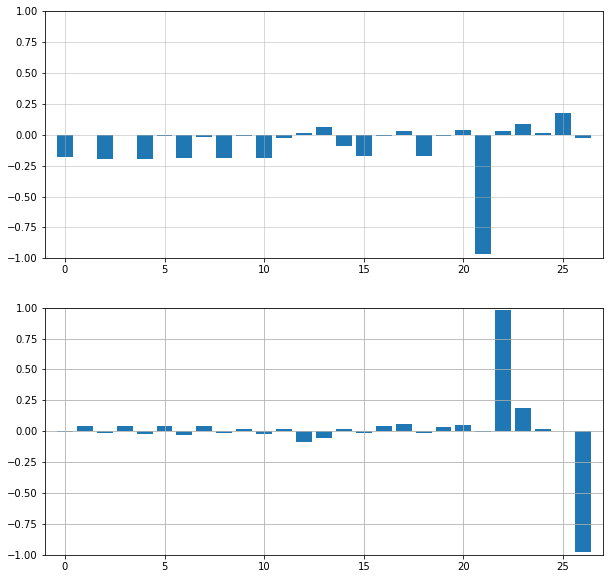

In [112]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.bar(np.arange(len(corrcoef[0])), corrcoef[0])
plt.xlim(-1,27)
plt.ylim(-1.0,1.0)
plt.grid(True)

plt.subplot(2,1,2)
plt.bar(np.arange(len(corrcoef[1])), corrcoef[1])
plt.xlim(-1,27)
plt.ylim(-1.0,1.0)
plt.grid(True)

plt.show()

결과:
- x좌표: D25 (3D target X좌표)
- y좌표: D26 (3D target Y좌표), Pitch

In [114]:
print(contents.columns[-8], ':', corrcoef[0][-6])
print(contents.columns[-7], ':', corrcoef[1][-5])
print(contents.columns[-3], ':', corrcoef[1][-1])

OF_d25 : -0.9641934908847511
OF_d26 : 0.9831691057370229
Pitch : -0.9803356104294824


In [118]:
print(contents.columns[-8:-5], contents.columns[-4:-2])

Index(['OF_d25', 'OF_d26', 'OF_d27'], dtype='object') Index(['Yaw', 'Pitch'], dtype='object')
